<a href="https://colab.research.google.com/github/arumm25/Repo1-PenambanganData/blob/main/Repository7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from google.colab import drive

# Attempt to unmount cleanly if already mounted
try:
  drive.flush_and_unmount()
except Exception:
  # If clean unmount fails, try a forceful system unmount
  try:
    !fusermount -uz /content/drive
  except Exception:
    pass # Ignore if unmount still fails or not mounted

# Ensure the mount point directory is truly empty by removing and recreating it
if os.path.exists('/content/drive'):
  print("Clearing existing /content/drive directory...")
  !rm -rf /content/drive
  print("Recreating /content/drive directory...")
  os.makedirs('/content/drive')
else:
  os.makedirs('/content/drive') # Create if it doesn't exist

drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Clearing existing /content/drive directory...
Recreating /content/drive directory...
Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
path = '/content/drive/MyDrive/Penambangan Data/Dataset Iris.csv'
df = pd.read_csv(path, delimiter=';')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.04,Iris-versicolor
1,2,6.04,3.02,4.05,1.05,Iris-versicolor
2,3,6.09,3.01,4.09,1.05,Iris-versicolor
3,4,5.05,2.03,4.00,1.03,Iris-versicolor
4,5,6.05,2.08,4.06,1.05,Iris-versicolor


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Id;SepalLengthCm;SepalWidthCm;PetalLengthCm;PetalWidthCm;Species  100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


,0
Id;SepalLengthCm;SepalWidthCm;PetalLengthCm;PetalWidthCm;Species,0


In [12]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [14]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # pembeda: pakai entropy, bukan gini
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [15]:
y_pred = dt_model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [17]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [18]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 10]])

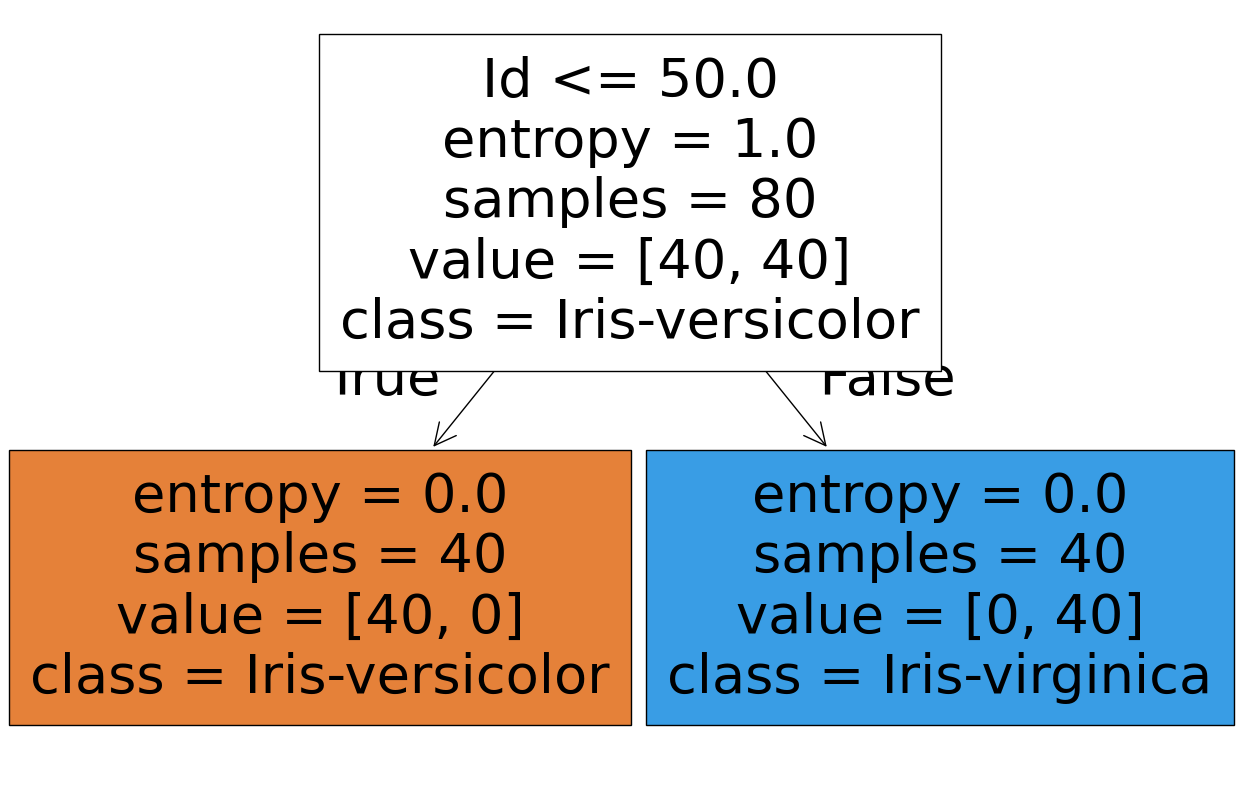

In [19]:
plt.figure(figsize=(16,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=dt_model.classes_,
    filled=True
)
plt.show()

In [20]:
import joblib

save_path = '/content/drive/MyDrive/model'
joblib.dump(dt_model, f'{save_path}/decision_tree_iris.pkl')

print("Model Decision Tree Iris berhasil disimpan")

Model Decision Tree Iris berhasil disimpan


In [21]:
dt_loaded = joblib.load(f'{save_path}/decision_tree_iris.pkl')